Nama: Farah Dhia Fadhila</br>
NRP: 5025211030</br>
Kelas: Pembelajaran Mesin C

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

data_train = pd.read_csv('./drive/MyDrive/ML/IRIS_Train.csv')
data_test = pd.read_csv('./drive/MyDrive/ML/IRIS_Test.csv')

In [3]:
print(data_train)
print(data_test)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
115           6.8          3.2           5.9          2.3  Iris-virginica
116           6.7          3.0           5.2          2.3  Iris-virginica
117           6.3          2.5           5.0          1.9  Iris-virginica
118           6.5          3.0           5.2          2.0  Iris-virginica
119           6.2          3.4           5.4          2.3  Iris-virginica

[120 rows x 5 columns]
    sepal_length  sepal_width  petal_length  petal_width          species
0            5

In [4]:
print(f"data train: \n{data_train.describe()}\n")
print(f"data test: \n{data_test.describe()}")

data train: 
       sepal_length  sepal_width  petal_length  petal_width
count    120.000000   120.000000    120.000000   120.000000
mean       5.865833     3.050833      3.770833     1.205000
std        0.851938     0.436756      1.785958     0.758686
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.575000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

data test: 
       sepal_length  sepal_width  petal_length  petal_width
count     30.000000    30.000000     30.000000    30.000000
mean       5.753333     3.066667      3.710000     1.173333
std        0.730957     0.427772      1.704022     0.793479
min        4.700000     2.200000      1.200000     0.100000
25%        5.100000     2.800000      1.675000     0.225000
50%        5.650000     3.000000      4.050000     1.300000
75%        6.3

In [5]:
print(f"data train:\n{data_train.isna().sum()}\n")
print(f"data test:\n{data_test.isna().sum()}")

data train:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

data test:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
print(f"data train:\n{data_train['species'].unique()}\n")
print(f"data test:\n{data_test['species'].unique()}")

data train:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

data test:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_train['species'] = label_encoder.fit_transform(data_train['species'])
data_test['species'] = label_encoder.fit_transform(data_test['species'])

print(data_train['species'])
print(data_test['species'])


0      0
1      0
2      0
3      0
4      0
      ..
115    2
116    2
117    2
118    2
119    2
Name: species, Length: 120, dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
Name: species, dtype: int64


In [8]:
print(f"data train:\n{data_train['species'].unique()}\n")
print(f"data test:\n{data_test['species'].unique()}")

data train:
[0 1 2]

data test:
[0 1 2]


In [9]:
X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]

X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

print(y_train)

0      0
1      0
2      0
3      0
4      0
      ..
115    2
116    2
117    2
118    2
119    2
Name: species, Length: 120, dtype: int64


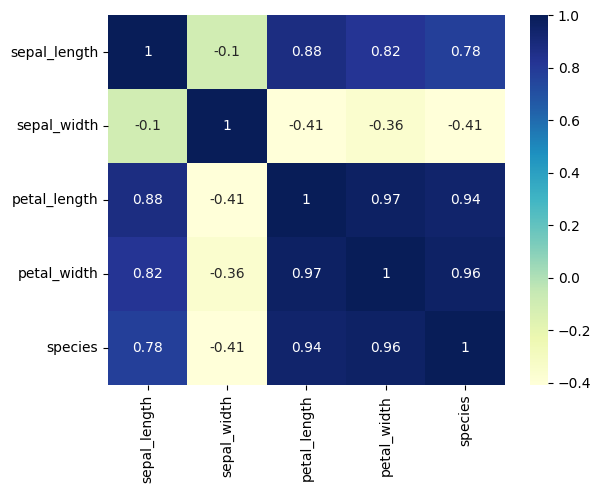

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

dataplot = sns.heatmap(data_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

<Axes: xlabel='species', ylabel='count'>

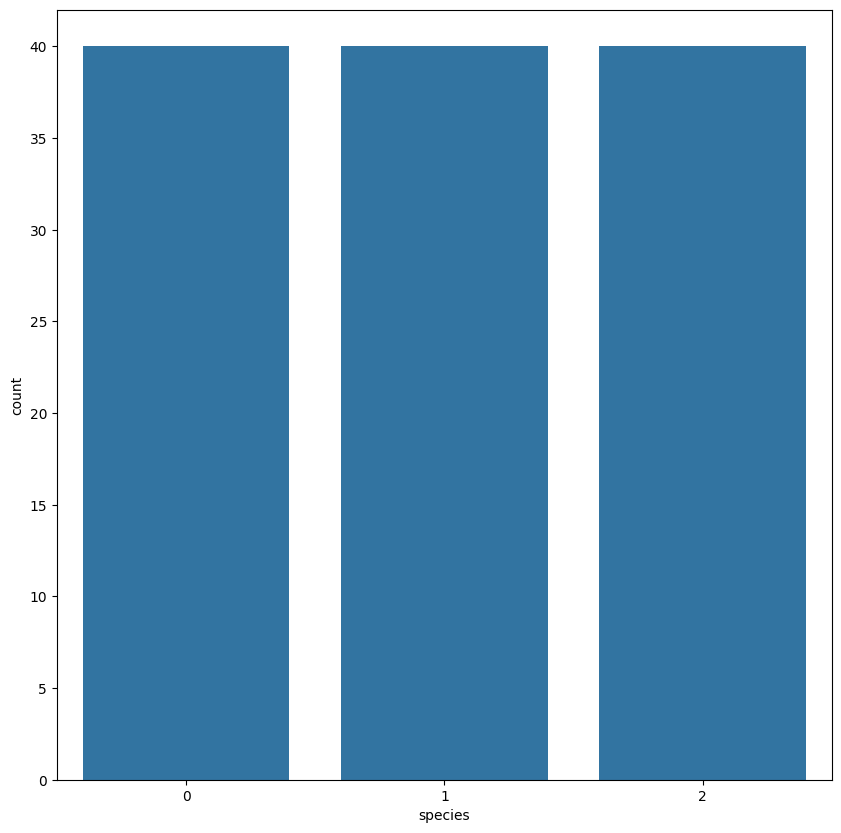

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='species',data=data_train)

<Axes: xlabel='species', ylabel='count'>

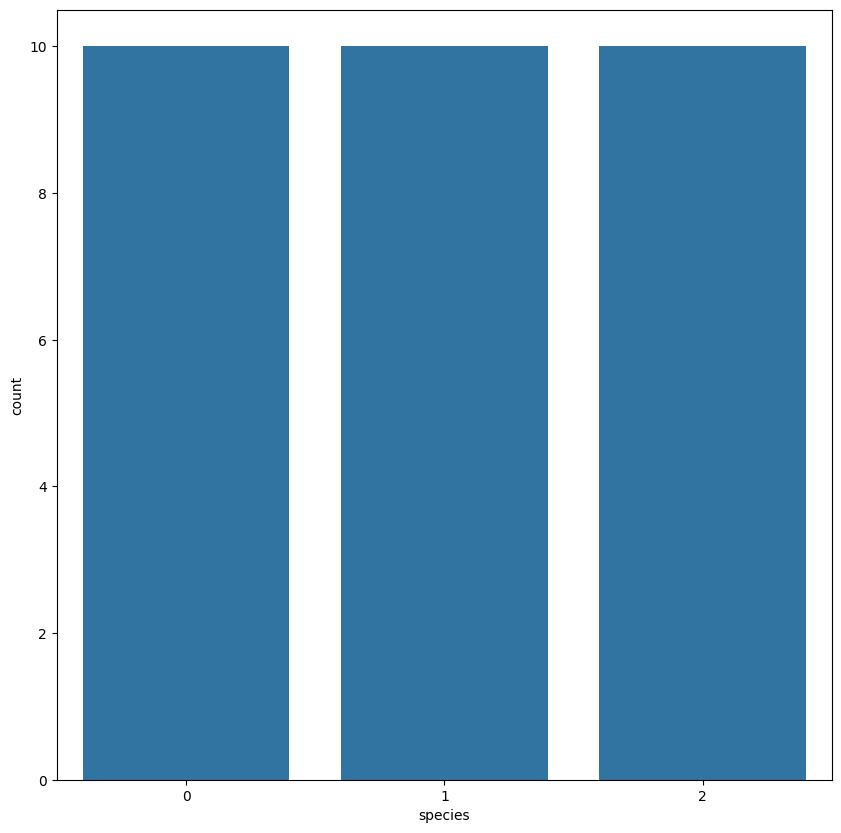

In [12]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='species',data=data_test)

# Skenario 1 (Tanpa normalisasi data)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score

In [14]:
# @title Decision Tree criterion=gini
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.9333333333333333
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Recall: 0.9333333333333332
Specificity: 0.9666666666666667
Precision: 0.9444444444444445
F-Measure: 0.9326599326599326


In [15]:
# @title Decision Tree criterion=entropy
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.9333333333333333
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Recall: 0.9333333333333332
Specificity: 0.9666666666666667
Precision: 0.9444444444444445
F-Measure: 0.9326599326599326


In [16]:
# @title KNN k=3
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

neigh_train_acc = accuracy_score(y_train, neigh.predict(X_train))
neigh_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {neigh_train_acc}")
print(f"Test accuracy of KNN is : {neigh_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of KNN is : 0.9583333333333334
Test accuracy of KNN is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [17]:
# @title KNN k=5
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

neigh_train_acc = accuracy_score(y_train, neigh.predict(X_train))
neigh_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {neigh_train_acc}")
print(f"Test accuracy of KNN is : {neigh_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of KNN is : 0.975
Test accuracy of KNN is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [18]:
# @title KNN k=7
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

neigh_train_acc = accuracy_score(y_train, neigh.predict(X_train))
neigh_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {neigh_train_acc}")
print(f"Test accuracy of KNN is : {neigh_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of KNN is : 0.975
Test accuracy of KNN is : 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Recall: 1.0
Specificity: 1.0
Precision: 1.0
F-Measure: 1.0


In [19]:
# @title Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

nb_train_acc = accuracy_score(y_train, nb.predict(X_train))
nb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Naive Bayes is : {nb_train_acc}")
print(f"Test accuracy of Naive Bayes is : {nb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of Naive Bayes is : 0.9666666666666667
Test accuracy of Naive Bayes is : 0.9333333333333333
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Recall: 0.9333333333333332
Specificity: 0.9666666666666667
Precision: 0.9444444444444445
F-Measure: 0.9326599326599326


In [20]:
# @title SVM kernel=linear

from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of SVM is : 0.975
Test accuracy of SVM is : 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Recall: 1.0
Specificity: 1.0
Precision: 1.0
F-Measure: 1.0


In [21]:
# @title SVM kernel=polynomial

from sklearn import svm

svm_model = svm.SVC(kernel='poly')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of SVM is : 0.975
Test accuracy of SVM is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [22]:
# @title SVM kernel=rbf

from sklearn import svm

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of SVM is : 0.9583333333333334
Test accuracy of SVM is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [23]:
# @title SVM kernel=sigmoid

from sklearn import svm

svm_model = svm.SVC(kernel='sigmoid')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of SVM is : 0.08333333333333333
Test accuracy of SVM is : 0.03333333333333333
[[ 1  0  9]
 [ 7  0  3]
 [10  0  0]]
              precision    recall  f1-score   support

           0       0.06      0.10      0.07        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10

    accuracy                           0.03        30
   macro avg       0.02      0.03      0.02        30
weighted avg       0.02      0.03      0.02        30

Recall: 0.03333333333333333
Specificity: 0.5166666666666666
Precision: 0.018518518518518517
F-Measure: 0.023809523809523808


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [24]:
# @title ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train_one_hot, epochs=100, batch_size=32)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# ann_train_acc = accuracy_score(y_train, y_train_classes)
ann_test_acc = accuracy_score(y_test_classes, y_pred_classes)

print(f"Test accuracy of ANN is : {ann_test_acc}")

print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

print(f"Recall: {recall_score(y_test_classes, y_pred_classes, average='macro')}")
print(f"Specificity: {specificity_score(y_test_classes, y_pred_classes, average='macro')}")
print(f"Precision: {precision_score(y_test_classes, y_pred_classes, average='macro')}")
print(f"F-Measure: {f1_score(y_test_classes, y_pred_classes, average='macro')}")

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 1.1486 - accuracy: 0.1083
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1414 - accuracy: 0.1750
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1342 - accuracy: 0.3167
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1272 - accuracy: 0.5500
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1224 - accuracy: 0.6583
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1178 - accuracy: 0.6583
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1143 - accuracy: 0.6500
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1111 - accuracy: 0.6167
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1088 - accuracy: 0.5917
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1059 - accuracy: 0.5750
Epoch 11/100
4/4 [===========

# Skenario 2 (Normalisasi Min-Max Scalling)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [26]:
# @title Decision Tree criterion=gini
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train_scaled, y_train)

y_pred = dtc.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train_scaled))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.9333333333333333
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Recall: 0.9333333333333332
Specificity: 0.9666666666666667
Precision: 0.9333333333333332
F-Measure: 0.9333333333333332


In [27]:
# @title Decision Tree criterion=entropy
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train_scaled, y_train)

y_pred = dtc.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train_scaled))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.9333333333333333
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Recall: 0.9333333333333332
Specificity: 0.9666666666666667
Precision: 0.9333333333333332
F-Measure: 0.9333333333333332


In [28]:
# @title KNN k=3
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

neigh_train_acc = accuracy_score(y_train, neigh.predict(X_train_scaled))
neigh_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {neigh_train_acc}")
print(f"Test accuracy of KNN is : {neigh_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of KNN is : 0.975
Test accuracy of KNN is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [29]:
# @title KNN k=5
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

neigh_train_acc = accuracy_score(y_train, neigh.predict(X_train_scaled))
neigh_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {neigh_train_acc}")
print(f"Test accuracy of KNN is : {neigh_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of KNN is : 0.9833333333333333
Test accuracy of KNN is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [30]:
# @title KNN k=7
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

neigh_train_acc = accuracy_score(y_train, neigh.predict(X_train_scaled))
neigh_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {neigh_train_acc}")
print(f"Test accuracy of KNN is : {neigh_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of KNN is : 0.9833333333333333
Test accuracy of KNN is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [31]:
# @title Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)

nb_train_acc = accuracy_score(y_train, nb.predict(X_train_scaled))
nb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Naive Bayes is : {nb_train_acc}")
print(f"Test accuracy of Naive Bayes is : {nb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of Naive Bayes is : 0.9666666666666667
Test accuracy of Naive Bayes is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [32]:
# @title SVM kernel=linear

from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train_scaled))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of SVM is : 0.9833333333333333
Test accuracy of SVM is : 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Recall: 1.0
Specificity: 1.0
Precision: 1.0
F-Measure: 1.0


In [33]:
# @title SVM kernel=polynomial

from sklearn import svm

svm_model = svm.SVC(kernel='poly')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train_scaled))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of SVM is : 0.975
Test accuracy of SVM is : 0.9333333333333333
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Recall: 0.9333333333333332
Specificity: 0.9666666666666667
Precision: 0.9444444444444445
F-Measure: 0.9326599326599326


In [34]:
# @title SVM kernel=rbf

from sklearn import svm

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train_scaled))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of SVM is : 0.9666666666666667
Test accuracy of SVM is : 0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall: 0.9666666666666667
Specificity: 0.9833333333333334
Precision: 0.9696969696969697
F-Measure: 0.9665831244778613


In [35]:
# @title SVM kernel=sigmoid

from sklearn import svm

svm_model = svm.SVC(kernel='sigmoid')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

svm_train_acc = accuracy_score(y_train, svm_model.predict(X_train_scaled))
svm_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {svm_train_acc}")
print(f"Test accuracy of SVM is : {svm_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"Specificity: {specificity_score(y_test, y_pred, average='macro')}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"F-Measure: {f1_score(y_test, y_pred, average='macro')}")

Training accuracy of SVM is : 0.275
Test accuracy of SVM is : 0.4
[[10  0  0]
 [ 1  2  7]
 [ 7  3  0]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.40      0.20      0.27        10
           2       0.00      0.00      0.00        10

    accuracy                           0.40        30
   macro avg       0.32      0.40      0.33        30
weighted avg       0.32      0.40      0.33        30

Recall: 0.39999999999999997
Specificity: 0.7000000000000001
Precision: 0.31851851851851853
F-Measure: 0.326984126984127


In [36]:
# @title ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(6, activation='relu',))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train_scaled, y_train_one_hot, epochs=100, batch_size=32)

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Evaluasi model
ann_test_acc = accuracy_score(y_test_classes, y_pred_classes)

print(f"Test accuracy of ANN is : {ann_test_acc}")

print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

print(f"Recall: {recall_score(y_test_classes, y_pred_classes, average='macro')}")
print(f"Specificity: {specificity_score(y_test_classes, y_pred_classes, average='macro')}")
print(f"Precision: {precision_score(y_test_classes, y_pred_classes, average='macro')}")
print(f"F-Measure: {f1_score(y_test_classes, y_pred_classes, average='macro')}")


Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.0460 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0386 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0313 - accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0242 - accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0170 - accuracy: 0.3583
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0098 - accuracy: 0.4167
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0021 - accuracy: 0.5333
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9945 - accuracy: 0.6167
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9865 - accuracy: 0.6333
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9783 - accuracy: 0.6583
Epoch 11/100
4/4 [===========